In [54]:
'''
@Author: Stefan Angelov
@Created: 03/29/2021
@Purpose: Search craigslist for used cars
'''

'\n@Author: Stefan Angelov\n@Created: 03/29/2021\n@Purpose: Search craigslist for used cars\n'

In [109]:
import smtplib
import requests
from requests import get
# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup as bs4
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time, sleep
import re
from random import randint
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import clear_output

In [110]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
# Access/Initiate Database
db = client['cars_database']
# Access/Initiate Collection
cars_collection = db['cars_collection']


In [111]:
###############################################

In [112]:
def craigs_list(locations, min_price, max_price, min_year, max_year):
    
    dfs = []
    master = []
    
    for location in locations:
        
        s = 0
        
        url = 'https://' + str(location) + '.craigslist.org/search/cta?s='\
        + str(s) + '&min_price=' + str(min_price) + '&max_price=' + str(max_price)\
        + '&min_auto_year=' + str(min_year) +'&max_auto_year=' + str(max_year)
        
        r = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, 'lxml')
        total = str(soup.findAll('span', {'class': 'totalcount'})[0].contents)[2:-2]
        count = int(total)/120
        
        while(count > 0):
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s="\
            + str(s) + "&min_price=" + str(min_price) + "&max_price="\
            + str(max_price) + "&min_auto_year=" + str(min_year)\
            + "&max_auto_year=" + str(max_year)
            print(url)
            r = requests.get(url)
            html_page = r.text
            soup = bs4(html_page, 'lxml')
            
            values = add_to_df(soup)
            s = s + 120
            count = count - 1
            
            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2],values[3], values[4]]),
                columns = ["Price", "Location","Title","Link", "Date"])
            craig_df = craig_df.dropna()
            
            dfs.append(craig_df)
            
            craig_df = 0
            
        #concat all dfs here
        d = pd.concat(dfs)
        master.append(d)
        d = []
        dfs = []
            
    return master
    

In [113]:
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = 'Price')
    plt.show()

In [114]:
def add_to_df(soup):
    link_list = []
    listing_prices = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []
    
    for car in soup.find_all('li', class_= 'result-row'):

        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')

        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            #not possible
            prices.append('N/A')

        try:
            titles.append(car.find(class_ = "result-title hdrlnk").contents)
        except:
            titles.append('N/A')

        try:
            date.append(car.find(class_ = "result-date").contents)
        except:
            date.append('N/A')


    for car in soup.findAll("a", {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])

    return [prices, hoods, titles,link_list, date]


25.0
https://sacramento.craigslist.org/search/cta?s=0&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
24.0
https://sacramento.craigslist.org/search/cta?s=120&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
23.0
https://sacramento.craigslist.org/search/cta?s=240&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
22.0
https://sacramento.craigslist.org/search/cta?s=360&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
21.0
https://sacramento.craigslist.org/search/cta?s=480&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
20.0
https://sacramento.craigslist.org/search/cta?s=600&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
19.0
https://sacramento.craigslist.org/search/cta?s=720&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
18.0
https://sacramento.craigslist.org/search/cta?s=840&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
17.0
https

8.0
https://chicago.craigslist.org/search/cta?s=2040&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
7.0
https://chicago.craigslist.org/search/cta?s=2160&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
6.0
https://chicago.craigslist.org/search/cta?s=2280&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
5.0
https://chicago.craigslist.org/search/cta?s=2400&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
4.0
https://chicago.craigslist.org/search/cta?s=2520&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
3.0
https://chicago.craigslist.org/search/cta?s=2640&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
2.0
https://chicago.craigslist.org/search/cta?s=2760&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
1.0
https://chicago.craigslist.org/search/cta?s=2880&min_price=500&max_price=50000&min_auto_year=2000&max_auto_year=2020
sfbay


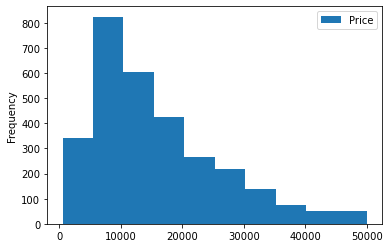

losangeles


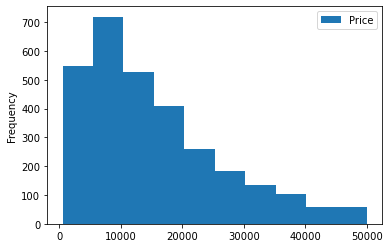

In [116]:
locations = ['sacramento', 'newyork', 'chicago']
min_price = 500
max_price= 50000
min_year = 2000
max_year = 2020
df = craigs_list(locations, min_price, max_price, min_year, max_year)





sacramento


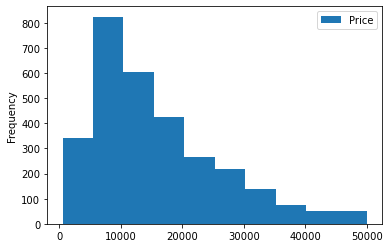

newyork


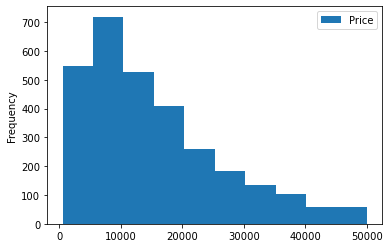

chicago


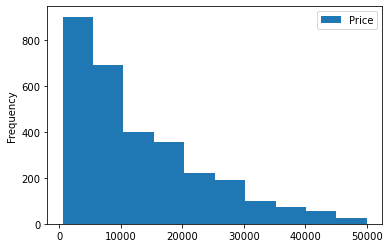

In [117]:
print("sacramento")
graph_cars(df[0])
print("newyork")
graph_cars(df[1])
print("chicago")
graph_cars(df[2])

#Save the dataframes into csv files
df[0].to_csv("sacramento.csv")
df[1].to_csv("newyork.csv")
df[2].to_csv("chicago.csv")

In [107]:
df[1]

,Price,Location,Title,Link,Date
0,"$4,400",N/A,2003 Mercedes C240,https://losangeles.craigslist.org/lgb/cto/d/lo...,Mar 29
1,"$4,000",Baldwin Park,2006 Honda Pilot,https://losangeles.craigslist.org/sgv/cto/d/ba...,Mar 29
2,"$5,995",+ 714 Auto,2010 Honda Civic Sedan LX,https://losangeles.craigslist.org/lgb/ctd/d/or...,Mar 29
3,"$5,950",Los Angeles,2008 BMW 535 I Sport Premium package,https://losangeles.craigslist.org/sfv/cto/d/in...,Mar 29
4,"$1,400",N/A,2007 Toyota rav4 Clean title**Perfect condition**,https://losangeles.craigslist.org/wst/cto/d/lo...,Mar 29
...,...,...,...,...,...
115,"$34,999",ORANGE,2016 Toyota 4Runner PRICE,https://losangeles.craigslist.org/ant/ctd/d/or...,Mar 26
116,"$1,950",N/A,"2007 CHRYSLER PT CRUISER, RUNS GREAT, AUTOMATI...",https://losangeles.craigslist.org/lac/cto/d/wi...,Mar 26
117,"$15,590",Autohighway,2014 Ford Expedition Limited Sport Utility 4D ...,https://losangeles.craigslist.org/sfv/ctd/d/su...,Mar 26
118,"$8,477",CALL *562-203-6953*for Instant Availability-Up...,2017 Kia Forte LX SKU:HE080850 Sedan,https://losangeles.craigslist.org/lgb/ctd/d/ce...,Mar 26


In [ ]:
#######################################################################

In [ ]:
#get the first page of the SF car prices
response = get('https://sfbay.craigslist.org/d/cars-trucks/search/cta?bundleDuplicates=1&hasPic=1&postedToday=1&query=car&sort=rel')

In [56]:
def timeConvert(miliTime):
    hours, minutes = miliTime.split(":")
    hours, minutes = int(hours), int(minutes)
    setting = "AM"
    if hours > 12:
        setting = "PM"
        hours -= 12
    return ("%02d:%02d" + setting) % (hours, minutes)

In [57]:
def getDetailsRaw(car_link):
    try:
        rsp = requests.get(car_link)
        html = bs4(rsp.text, 'html.parser')
        attrs = html.findAll("p", {"class":"attrgroup"})
        price = html.findAll("span", {"class": "price"})
        price_start = str(price[0]).find("$")
        price_end = str(price[0]).rfind("<")
        price_final = str(price[0])[price_start:price_end]
        
        post_date_data = html.findAll("time", {"class":"data timeago"})
        post_date_end = str(post_date_data[0]).rfind('</time>')
        post_date = str(post_date_data[0])[post_date_start:post_date_end]
        time = post_date.split()
        
        new_time = time_convert(time[1])
        
        new_date_time = " " + str(time[0]) + " " + str(newTime)
        return attrs, pricefinal, new_date_time
    except:
        print("Issue finding post: it may have been deleted")

In [58]:
def sendInquiry(recipient, car):
    fromaddr = '@gmail.com'
    username = '@gmail.com'
    password = ''
    server = smtplib.SMTP('smtp.gmail.com:587')
    server.ehlo()
    server.starttls()
    server.login(username, password)
    
    msg2 = 'Hi, I saw your post about the' + car + ', and was wondring if it is still available?'
    msg = '\r\n'.join([
        "From: " + fromaddr,
        "To: " + ",".join(fromaddr),
        "Subject: " + car,
        msg2
    ])
    server.sendmail(fromaddr, fromaddr, msg)
    server.quit()


In [59]:
def checkDeal(condition, cylinders, drive, fuel, odometer, paint, size, title_status,\
              trans, type_, year):
    want_it = False
    
    conditions_want  = ['new', 'good', 'like new', 'excellent']
    miles_want = 108000
    color_want = ['black', 'blue', 'grey' , 'red', 'silver', 'white', 'custom']
    title_status_want = 'clean'
    transmission_want = 'automatic'
    type_want = ['sedan', 'coupe', 'SUV']
    year_want = 2007
    if condition.lower() in conditions_want:
        if int(odometer) <= miles_want:
            if paint in color_want:
                if title_status.lower() == title_status_want:
                    if trans == transmission_want:
                        if type in type_want:
                            try:
                                if int(year) >= year_want:
                                    want_it = True
                            except:
                                print("Year uncertain, inquiry not sent. \n"
                                      "Year might be: " + year)
    return want_it

In [60]:
def check_if_replied(title, car_link, condition, drive, fuel, odometer, paint, \
                     size, title_status, trans, type_, year, cylinders):
    with open('deals.csv', newline='') as csvfile:
        dealreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        x = 0
        for row in dealreader:
            if x > 0:
                for x in range(len(row)):
                    if row[0] == title:
                        if row[2] == condition:
                            if row[3] == drive:
                                if row[4] == fuel:
                                    if (row[5] == odometer):
                                        if row[6] == paint:
                                            if row[9] == trans:
                                                if row[10] == type_:
                                                    if row[11] == year:
                                                        if row[12] == cylinders:
                                                            return True
        x += 1
    return True

In [61]:
def logDeal(title, carlink, condition, drive, fuel, odometer, paint, size,\
            title_status, trans, type_, year, cylinders):
    with open('deals.csv', mode='a') as deals_file:
        deal_writer = csv.writer(deals_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        row_to_log = [title, car_link, condition, drive, fuel, odometer, paint, size,\
                      title_status, trans, type_, year, cylinders]
        deal_writer.writerow(row_to_log)
        

In [62]:
def parseDetails(cars, html):
    for x in range(len(cars)):
        time.sleep(1)
        link = html.findAll('a', {'class': 'result-title hdrlnk'})
        
        #direct link to a cars post
        car_link = str(link[x])[str(link[x]).find('href=') + 6:str(link[x]).rfind('">')]
        print("-" * 200)
        print(car_link)
        
        #This returns the details in a list of size 2, and parses out the price and post date
        
        details, price, post_date = getDetailsRaw(car_link)
        
        print('\n', post_date, '\n')
        
        condition, title_status, drive, fuel, odometer, paint, size, trans, type_, 
        cylinders, year, title = '', '', '', '', '', '', '', '', '', '', '', ''
        
        for i in range(len(details)):
            if (i==0): # the title
                titlestart = str(details[i]).find('<b>') + 3
                titleend = str(details[i]).rfind('</b>')
                title = str(details[i])[titlestart:titleend]
            elif (i == 1): #the rest of the details
                details2 = str(details[i]).split('<br/>')
                
                # The details list can vary in order depending on 
                # if it includes things sucj as the VIN
                # So the best way to handle this was to check if the keyword exists within the raw html
                for y in range(len(details2)):
                    if ("condition" in str(details2[y]).lower()):
                        # the text we want is within <b> </b> 
                        #so we can use string slicing to get it
                        conditionstart = str(details2[y]).find("<b>") + 3
                        conditionend = str(details2[y]).rfind("</b>")
                        condition = str(details2[y])[conditionstart:conditionend]
                    elif ("cylinder" in str(details2[y]).lower()):
                        cylindersStart = str(details2[y]).find("<b>") + 3
                        cylindersEnd = str(details2[y]).rfind("</b>")
                        cylinders = str(details2[y])[cylindersStart:cylindersEnd]
                    elif ("drive" in str(details2[y]).lower()):
                        driveStart = str(details2[y]).find("<b>") + 3
                        driveEnd = str(details2[y]).rfind("</b>")
                        drive = str(details2[y])[driveStart:driveEnd]
                    elif ("fuel" in str(details2[y]).lower()):
                        fuelStart = str(details2[y]).find("<b>") + 3
                        fuelEnd = str(details2[y]).rfind("</b>")
                        fuel = str(details2[y])[fuelStart:fuelEnd]
                    elif ("odometer" in str(details2[y]).lower()):
                        odometerStart = str(details2[y]).find("<b>") + 3
                        odometerEnd = str(details2[y]).rfind("</b>")
                        odometer = str(details2[y])[odometerStart:odometerEnd]
                    elif ("paint" in str(details2[y]).lower()):
                        paintStart = str(details2[y]).find("<b>") + 3
                        paintEnd = str(details2[y]).rfind("</b>")
                        paint = str(details2[y])[paintStart:paintEnd]
                    elif ("size" in str(details2[y]).lower()):
                        sizeStart = str(details2[y]).find("<b>") + 3
                        sizeEnd = str(details2[y]).rfind("</b>")
                        size = str(details2[y])[sizeStart:sizeEnd]
                    elif ("title" in str(details2[y]).lower()):
                        titleStart = str(details2[y]).find("<b>") + 3
                        titleEnd = str(details2[y]).rfind("</b>")
                        titleStatus = str(details2[y])[titleStart:titleEnd]
                    elif ("transmission" in str(details2[y]).lower()):
                        transStart = str(details2[y]).find("<b>") + 3
                        transEnd = str(details2[y]).rfind("</b>")
                        trans = str(details2[y])[transStart:transEnd]
                    elif ("type" in str(details2[y]).lower()):
                        typeStart = str(details2[y]).find("<b>") + 3
                        typeEnd = str(details2[y]).rfind("</b>")
                        type = str(details2[y])[typeStart:typeEnd]
        
        print('Car: ', title, '\t', 'Cost: ', price)
        clean_info = 'Condition: ' + condition + '\n' + 'Cylinders: ' + cylinders + '\n' +\
        'Drive: ' + drive + '\n' + 'Fuel: ' + fuel + '\n' + 'Odometer: ' + odometer + '\n' +\
        'Color: ' + paint + '\n' + 'Size: ' + size + '\n' + 'Title Status: ' + title_status +\
        '\n' + 'Transmission Type: ' + trans + '\n' + 'Type: ' + type_
        print(clean_info)

        year = title.lstrip()
        year = year[0:5]
        year = year.strip()

        deal = checkDeal(condition, cylinders, drive, fuel, odometer, paint,\
                         size, title_status, trans, type_, year)

        if deal:
            if not checkIfReplied(title, carlink, condition, drive, fuel, odometer, paint, size,\
                                 title_status, trans, type_, year, cylinders):
                print('\n\n\n Possible Deal Found: Deal Logged \n\n\n')

            else:
                print('\n\n\n ALREADY REPLIED TO \n\n\n')
        print('-' * 200)

In [65]:
def main():
    url_base = "https://sfbay.craigslist.org/d/cars-trucks/search/cta"
    #FILTER BREAKDOWN:
    '''
    hasPic = 1/0: Only cars that have images with the listing 

    postedToday=0/1: Only cars that were posted today 

    searchDistance: int: Will only show cars within X miles of ZIP code

    postal string: Only vehicles within X miles of this param

    max_price int: Max price the car can be listed at

    max_auto_miles int: Max mileage for the car

    min_auto_miles int: Min mileage for the car

    auto_transmission int:  
        manual = 1
        automatic = 2
        other = 3

    auto_bodytype int:
        bus = 1
        convertible = 2
        coupe = 3
        hatchback = 4
        mini-van = 5
        offroad = 6
        pickup = 7
        sedan = 8
        truck = 9
        SUV = 10
        wagon = 11
        van = 12
        select all (if no others are in auto_bodytype list) = 13

    min_price int: min price for car

    auto_make_model string: filter by make and model

    min_auto_year int: Oldest year the car can be from 

    max_auto_year int: Newest year the car can be from 

    condition int:
        new = 10
        like new = 20
        excellent = 30 
        good = 40
        fair = 50 
        salvage = 60

    auto_cylinders int:
        3 cylinders = 1
        4 cylinders = 2
        5 cylinders = 3
        6 cylinders = 4
        8 cylinders = 5
        10 cylinders = 6
        12 cylinders = 7
        Any (if auto_cylinders list is empty) = 8

    auto_drivetrain int:
        rwd = 1
        fwd = 2
        4wd = 3

    auto_fuel_type int:
        gas = 1
        diesel = 2
        hybrid = 3
        electric = 4
        other = 6

    auto_paint int:
         black = 
         blue = 2
         brown = 20
         green = 3
         grey = 4
         orange = 5
         purple = 6
         red = 7
         silver = 8
         white = 9
         yellow = 10
         custom = 11

    auto_size int:
         compact = 1
         full-size = 2
         mid-size = 3
         sub-compact = 4


    auto_title_status int:
         clean = 1
         salvage = 2
         rebuilt = 3
         parts only = 4
         lien = 5
         missing = 6
    '''
    #SAMPLE PARAMS DICTIONARY
    params = dict(hasPic=1, postedToday=0, search_distance=25, postal='12345', max_price=5000, max_auto_miles=170000,
                  auto_transmission=2,
                  auto_bodytype={3, 10, 8})

#     params = dict()

    rsp = requests.get(url_base, params=params)
    # To check requests automatically created the right URL:
    print('Reading from:' + "\n\t" + rsp.url + "\n")

    print("Filters Currently On: \n")
    for key in params.keys():
        print(key, ": ", params.get(key))

    html = bs4(rsp.text, 'html.parser')

    # Find all car posts. They exist in an <li> with the class "result-row"
    # This can be found through the browser inspector
    cars = html.findAll("li", {"class": "result-row"})
    print("\n" + "Results: " + str(len(cars)))

    parseDetails(cars, html)



In [66]:
main()

Reading from:
	https://sfbay.craigslist.org/d/cars-trucks/search/cta?hasPic=1&postedToday=0&search_distance=25&postal=12345&max_price=5000&max_auto_miles=170000&auto_transmission=2&auto_bodytype=8&auto_bodytype=10&auto_bodytype=3

Filters Currently On: 

hasPic :  1
postedToday :  0
search_distance :  25
postal :  12345
max_price :  5000
max_auto_miles :  170000
auto_transmission :  2
auto_bodytype :  {8, 10, 3}

Results: 0


In [2]:

html_soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 139 (elements/page)

<class 'bs4.element.ResultSet'>
139


In [25]:
#grab the first post
post_one = posts[0]


In [23]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price.strip()

'$8,988'

In [28]:
#grab the time of the post in datetime format to save on cleaning efforts
post_one_time = post_one.find('time', class_='result-date')
post_one_datetime = post_one_time['datetime']

In [31]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = post_one.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']

#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text
post_one_title_text

'2016 Chevrolet Cruze - NEW TIRES - GAS SAVER - RECENTLY SMOGGED - GREAT COMM'

In [32]:
#the neighborhood is grabbed by finding the span class 'result-hood' and pulling the text element from that
post_one_hood = posts[0].find('span', class_='result-hood').text
post_one_hood

' (*2016* *Chevrolet* *Cruze* *-* *NEW* *TIRES* *-* *GAS* *)'

In [18]:
#build out the loop


In [ ]:
#find the total number of post to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
#pulled the total count of posts as the upper bound of the pages array
resutls_total = int(results_num.find('span', class_='totalcount').text)

#each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on.
#So we need to step in size 120 in the np.arange function
pages = np.arange(0, results_total+1, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
car_counts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = get("https://sfbay.craigslist.org/d/cars-trucks/search/cta"
                  + "s=" # the parameter for defining the page number
                  + str(page) #the page number in the pages array from earlier
                  + "&hasPic=1"
                  + "&availabilityMode=0")
    
    sleep(randint(1,5))
    
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_='result-row')
    
    #extract data item-wise
    for post in posts:
        
        if post.find('span', class_ = 'result-hood') is not None:
            
            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_='result-date')['datetime']
            post_timing.append(post_datetime)
            
            #neighborhoods
            post_hood = post.find('span', class_='result-hood').text
            
            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title_text
            post_title_texts.append(post_title_text)
            
            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            # removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            
            if post.find('span', class)